In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = xr.DataArray(np.random.randn(2,3), dims=('x', 'y'), coords={'x': [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.2703904 , -0.13214145, -1.22514002],
       [ 1.03704885,  0.40805121,  0.45034326]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [3]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [4]:
data[0,:]

<xarray.DataArray (y: 3)>
array([ 0.2703904 , -0.13214145, -1.22514002])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [5]:
data.loc[10]

<xarray.DataArray (y: 3)>
array([ 0.2703904 , -0.13214145, -1.22514002])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [6]:
data.isel(x=0)

<xarray.DataArray (y: 3)>
array([ 0.2703904 , -0.13214145, -1.22514002])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [7]:
data.sel(x=10)

<xarray.DataArray (y: 3)>
array([ 0.2703904 , -0.13214145, -1.22514002])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [8]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[10.2703904 ,  9.86785855,  8.77485998],
       [11.03704885, 10.40805121, 10.45034326]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [9]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.26710767, -0.13175722, -0.94085329],
       [ 0.86090654,  0.39682129,  0.4352746 ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [10]:
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[ 0.2703904 ,  1.03704885],
       [-0.13214145,  0.40805121],
       [-1.22514002,  0.45034326]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [11]:
data.sum()

<xarray.DataArray ()>
array(0.80855225)

In [12]:
data.mean(dim='x')

<xarray.DataArray (y: 3)>
array([ 0.65371962,  0.13795488, -0.38739838])
Dimensions without coordinates: y

In [13]:
a = xr.DataArray(np.random.randn(3), [data.coords['y']])
b = xr.DataArray(np.random.randn(4), dims='z')

In [14]:
a + b

<xarray.DataArray (y: 3, z: 4)>
array([[ 0.09333213,  1.29227316,  4.70336635,  1.57068721],
       [-0.88877905,  0.31016197,  3.72125516,  0.58857602],
       [-0.40104754,  0.79789349,  4.20898668,  1.07630754]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: z

In [15]:
labels = xr.DataArray(["E", "F", "E"], [data.coords["y"]], name="labels")

In [16]:
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [17]:
data.groupby(labels).mean('y')

<xarray.DataArray (x: 2, labels: 2)>
array([[-0.47737481, -0.13214145],
       [ 0.74369605,  0.40805121]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'

In [18]:
data.groupby(labels).map(lambda x: x - x.min())

<xarray.DataArray (x: 2, y: 3)>
array([[1.49553041, 0.        , 0.        ],
       [2.26218886, 0.54019266, 1.67548328]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

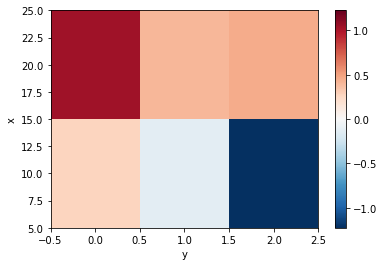

In [19]:
data.plot()

In [20]:
series = data.to_series()

In [21]:
series

x   y
10  0    0.270390
    1   -0.132141
    2   -1.225140
20  0    1.037049
    1    0.408051
    2    0.450343
dtype: float64

In [22]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.2703904 , -0.13214145, -1.22514002],
       [ 1.03704885,  0.40805121,  0.45034326]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) int64 0 1 2

In [23]:
ds = xr.Dataset(dict(foo=data, bar=("x", [1, 2]), baz=np.pi))
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.2704 -0.1321 -1.225 1.037 0.4081 0.4503
    bar      (x) int64 1 2
    baz      float64 3.142

In [24]:
ds.foo

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[ 0.2703904 , -0.13214145, -1.22514002],
       [ 1.03704885,  0.40805121,  0.45034326]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [25]:
arr = xr.DataArray([[1,2,3],[4,5,6]], 
                   [('x', [0,1]), ('y', [10,20,30])], 
                   attrs={'attribute': 'test array'}, name='val')
arr

<xarray.DataArray 'val' (x: 2, y: 3)>
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 0 1
  * y        (y) int64 10 20 30
Attributes:
    attribute:  test array

In [26]:
arr.coords['x']

<xarray.DataArray 'x' (x: 2)>
array([0, 1])
Coordinates:
  * x        (x) int64 0 1

In [29]:
arr.rolling(y=10)

DataArrayRolling [y->10]